### Import neccessary packages

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt # we only need pyplot
import seaborn as sb
sb.set_theme(style="white", palette=None)
pd.set_option("display.max_columns", None) #Show all columns, or else some will just be "..."

import warnings
warnings.filterwarnings('ignore')

from sklearn.tree import DecisionTreeClassifier

# machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report, f1_score
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc

from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.metrics import Precision, Recall

### Read Files

In [2]:
train_df = pd.read_csv("./datasets/train.csv")
train_df_oversampled = pd.read_csv("./datasets/train_oversampled.csv")
train_df_smoten = pd.read_csv("./datasets/train_smoten.csv")
test_df = pd.read_csv("./datasets/test.csv")

Before we continue, we split the test data into X_test and y_test

In [3]:
X_test = pd.DataFrame(test_df.loc[:, test_df.columns!= "INSTALLS_GROUP"])
y_test = pd.DataFrame(test_df.loc[:, "INSTALLS_GROUP"])

### Machine learning

**Function for model evaluation**

In [4]:
def evaluate_model(y_train,y_train_pred, y_test, y_test_pred):
    # Print the Classification Report
    print("Train Data")
    print(classification_report(y_train,y_train_pred))
    print()

    print("Train Data")
    print(classification_report(y_test,y_test_pred))

    # Plot the three-way Confusion Matrix
    f, axes = plt.subplots(1, 2, figsize=(18, 6))
    sb.heatmap(confusion_matrix(y_train, y_train_pred), 
            annot = True, fmt=".0f", annot_kws={"size": 18}, ax=axes[0])
    sb.heatmap(confusion_matrix(y_test, y_test_pred), 
            annot = True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1])

**Creating a Model for INSTALLS_GROUP: Attempt 1 (Decision Tree Using Imbalanced data)**

Since our data are mostly categorical variables, we chose Decision Tree as our model.

Our predictors for `INSTALLS_GROUP`: `CONTENT_RATING`, `CATEGORY`, `SIZEBAND`, `PRICEBAND`, `FREE`, `AD_SUPPORTED`, `IN_APP_PURCHASES`, `EDITORS_CHOICE`

In [5]:
# Extract train data
X_train = pd.DataFrame(train_df.loc[:, train_df.columns!= "INSTALLS_GROUP"])
y_train = pd.DataFrame(train_df.loc[:, "INSTALLS_GROUP"])

#Fit the model
decision_tree_original = DecisionTreeClassifier(max_depth=4)
decision_tree_original.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

Check the accuracy of the model

Train Data
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1571
           1       0.79      0.67      0.72       664

    accuracy                           0.85      2235
   macro avg       0.83      0.80      0.81      2235
weighted avg       0.84      0.85      0.84      2235


Train Data
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       520
           1       0.73      0.59      0.65       226

    accuracy                           0.81       746
   macro avg       0.78      0.75      0.76       746
weighted avg       0.80      0.81      0.80       746



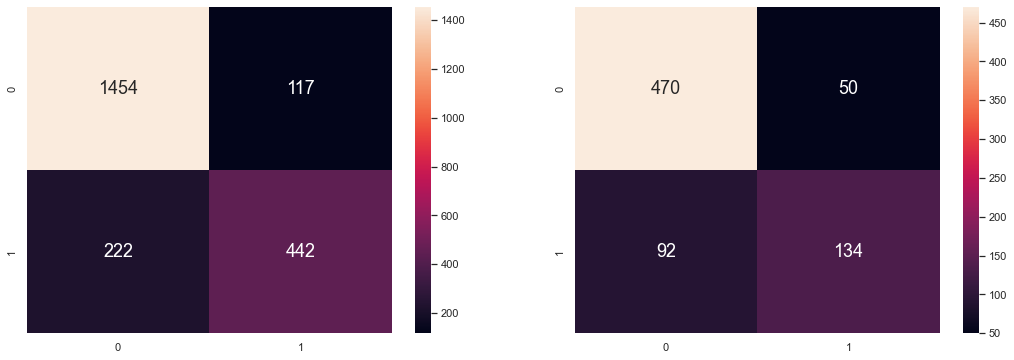

In [6]:
# Predict test data using the model created
y_train_pred = decision_tree_original.predict(X_train)
y_test_pred = decision_tree_original.predict(X_test)

evaluate_model(y_train, y_train_pred, y_test, y_test_pred)

**Creating a Model for RATING_GROUP: Attempt 2 (Decision Tree Using Oversampled (Randomly Sampled) data)**


In [7]:
# Extract train data
X_train_oversampled = pd.DataFrame(train_df_oversampled.loc[:, train_df_oversampled.columns!= "INSTALLS_GROUP"])
y_train_oversampled = pd.DataFrame(train_df_oversampled.loc[:, "INSTALLS_GROUP"])

#Fit the model
decision_tree_over = DecisionTreeClassifier(max_depth=4)
decision_tree_over.fit(X_train_oversampled, y_train_oversampled)

DecisionTreeClassifier(max_depth=4)

Train Data
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1672
           1       0.84      0.86      0.85      1672

    accuracy                           0.84      3344
   macro avg       0.84      0.84      0.84      3344
weighted avg       0.84      0.84      0.84      3344


Train Data
              precision    recall  f1-score   support

           0       0.94      0.81      0.87       520
           1       0.67      0.88      0.76       226

    accuracy                           0.83       746
   macro avg       0.80      0.84      0.82       746
weighted avg       0.86      0.83      0.84       746



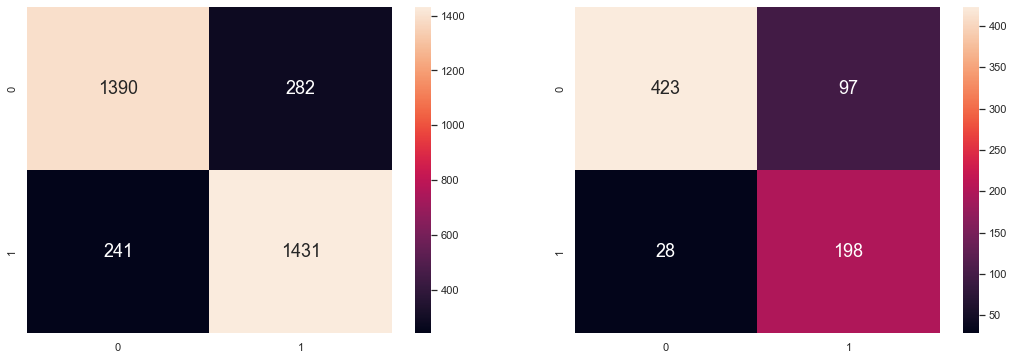

In [8]:
# Predict test data using the model created
y_train_oversampled_pred = decision_tree_over.predict(X_train_oversampled)
y_test_pred = decision_tree_over.predict(X_test)

evaluate_model(y_train_oversampled, y_train_oversampled_pred, y_test, y_test_pred)

**Creating a Model for RATING_GROUP: Attempt 3 (Decision Tree Using Oversampled (SMOTEN) data)**

In [9]:
# Extract train data
X_train_smoten = pd.DataFrame(train_df_smoten.loc[:, train_df_smoten.columns!= "INSTALLS_GROUP"])
y_train_smoten = pd.DataFrame(train_df_smoten.loc[:, "INSTALLS_GROUP"])

#Fit the model
decision_tree_smoten = DecisionTreeClassifier(max_depth=4)
decision_tree_smoten.fit(X_train_smoten, y_train_smoten)

DecisionTreeClassifier(max_depth=4)

Train Data
              precision    recall  f1-score   support

           0       0.92      0.77      0.84      1672
           1       0.80      0.93      0.86      1672

    accuracy                           0.85      3344
   macro avg       0.86      0.85      0.85      3344
weighted avg       0.86      0.85      0.85      3344


Train Data
              precision    recall  f1-score   support

           0       0.93      0.73      0.82       520
           1       0.59      0.87      0.70       226

    accuracy                           0.78       746
   macro avg       0.76      0.80      0.76       746
weighted avg       0.83      0.78      0.78       746



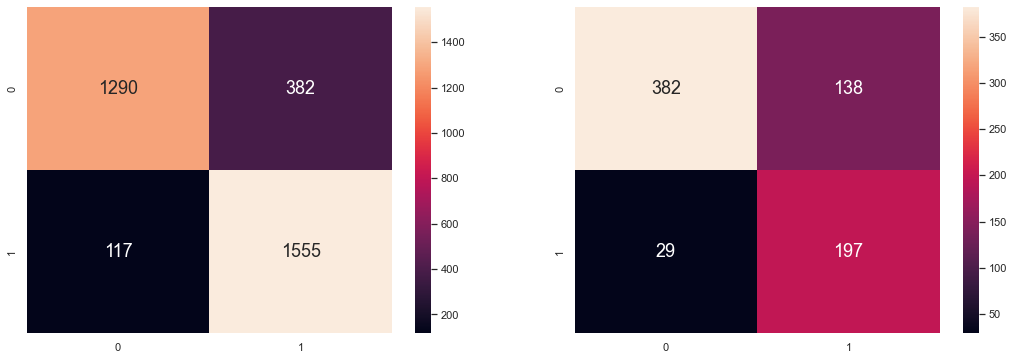

In [10]:
# Predict test data using the model created
y_train_smoten_pred = decision_tree_smoten.predict(X_train_smoten)
y_test_pred = decision_tree_smoten.predict(X_test)

evaluate_model(y_train_smoten, y_train_smoten_pred, y_test, y_test_pred)

Let's try to use more decision trees for this case

Train Data
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      1571
           1       0.77      0.70      0.73       664

    accuracy                           0.85      2235
   macro avg       0.82      0.81      0.81      2235
weighted avg       0.85      0.85      0.85      2235


Train Data
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       520
           1       0.71      0.65      0.68       226

    accuracy                           0.82       746
   macro avg       0.78      0.77      0.78       746
weighted avg       0.81      0.82      0.81       746



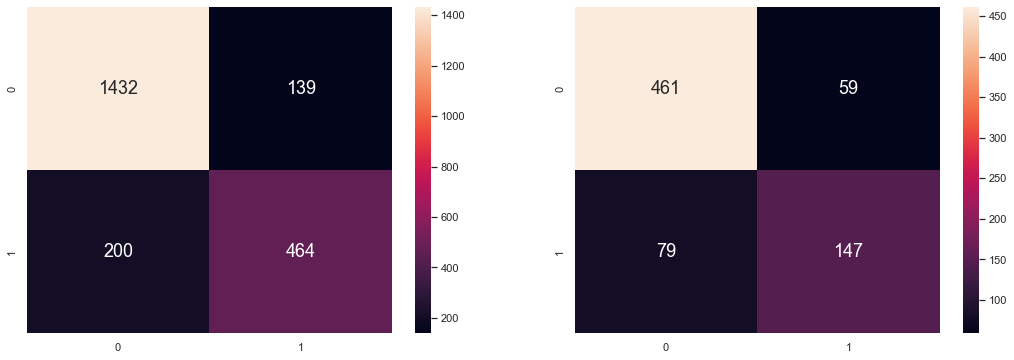

In [11]:
random_forest = RandomForestClassifier(max_depth=4, n_estimators=200)
random_forest.fit(X_train, y_train)

# Predict test data using the model created
y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

evaluate_model(y_train, y_train_pred, y_test, y_test_pred)

In [12]:
random_forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [13]:
param_grid = { 
    'n_estimators': np.arange(200, 1100, 100),
    'max_features': ['auto', 'sqrt'],
    'max_depth' : np.arange(4, 13),
}
CV_rfc = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv= 5, verbose=5)
CV_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV 1/5] END max_depth=4, max_features=auto, n_estimators=200;, score=0.846 total time=   0.2s
[CV 2/5] END max_depth=4, max_features=auto, n_estimators=200;, score=0.843 total time=   0.1s
[CV 3/5] END max_depth=4, max_features=auto, n_estimators=200;, score=0.839 total time=   0.1s
[CV 4/5] END max_depth=4, max_features=auto, n_estimators=200;, score=0.832 total time=   0.1s
[CV 5/5] END max_depth=4, max_features=auto, n_estimators=200;, score=0.852 total time=   0.1s
[CV 1/5] END max_depth=4, max_features=auto, n_estimators=300;, score=0.848 total time=   0.3s
[CV 2/5] END max_depth=4, max_features=auto, n_estimators=300;, score=0.846 total time=   0.3s
[CV 3/5] END max_depth=4, max_features=auto, n_estimators=300;, score=0.841 total time=   0.3s
[CV 4/5] END max_depth=4, max_features=auto, n_estimators=300;, score=0.834 total time=   0.3s
[CV 5/5] END max_depth=4, max_features=auto, n_estimators=300;, score=0.855 total 

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12]),
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': array([ 200,  300,  400,  500,  600,  700,  800,  900, 1000])},
             verbose=5)

In [14]:
CV_rfc.best_estimator_

RandomForestClassifier(max_depth=9, n_estimators=700)

Train Data
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1571
           1       0.81      0.82      0.81       664

    accuracy                           0.89      2235
   macro avg       0.87      0.87      0.87      2235
weighted avg       0.89      0.89      0.89      2235


Train Data
              precision    recall  f1-score   support

           0       0.87      0.88      0.88       520
           1       0.72      0.71      0.71       226

    accuracy                           0.83       746
   macro avg       0.80      0.79      0.79       746
weighted avg       0.83      0.83      0.83       746



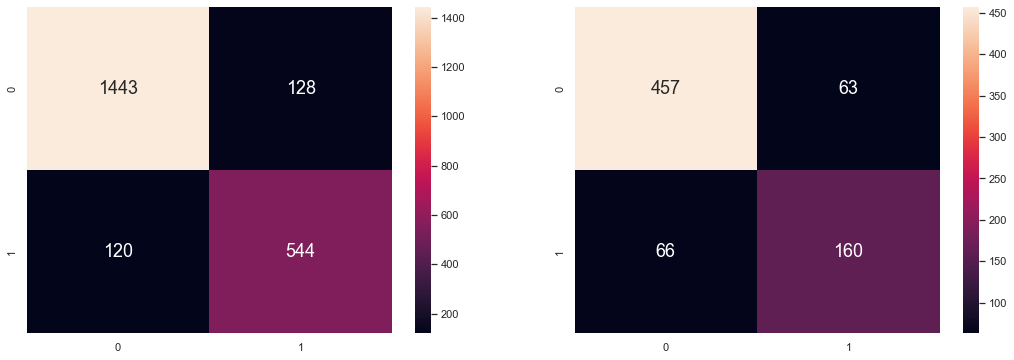

In [15]:
y_test_pred = CV_rfc.predict(X_test)
y_train_pred = CV_rfc.predict(X_train)

evaluate_model(y_train, y_train_pred, y_test, y_test_pred)

In [17]:
param_grid = { 
    'n_estimators': np.arange(200, 1100, 100),
    'max_features': ['auto', 'sqrt'],
    'max_depth' : np.arange(4, 13),
}
CV_rfc_over = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv= 5, verbose=5)
CV_rfc_over.fit(X_train_oversampled, y_train_oversampled)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV 1/5] END max_depth=4, max_features=auto, n_estimators=200;, score=0.843 total time=   0.2s
[CV 2/5] END max_depth=4, max_features=auto, n_estimators=200;, score=0.840 total time=   0.2s
[CV 3/5] END max_depth=4, max_features=auto, n_estimators=200;, score=0.851 total time=   0.2s
[CV 4/5] END max_depth=4, max_features=auto, n_estimators=200;, score=0.834 total time=   0.2s
[CV 5/5] END max_depth=4, max_features=auto, n_estimators=200;, score=0.831 total time=   0.2s
[CV 1/5] END max_depth=4, max_features=auto, n_estimators=300;, score=0.842 total time=   0.3s
[CV 2/5] END max_depth=4, max_features=auto, n_estimators=300;, score=0.843 total time=   0.3s
[CV 3/5] END max_depth=4, max_features=auto, n_estimators=300;, score=0.851 total time=   0.3s
[CV 4/5] END max_depth=4, max_features=auto, n_estimators=300;, score=0.833 total time=   0.3s
[CV 5/5] END max_depth=4, max_features=auto, n_estimators=300;, score=0.832 total 

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12]),
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': array([ 200,  300,  400,  500,  600,  700,  800,  900, 1000])},
             verbose=5)

In [18]:
CV_rfc_over.best_estimator_

RandomForestClassifier(max_depth=11, max_features='sqrt', n_estimators=500)

Train Data
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      1672
           1       0.88      0.95      0.92      1672

    accuracy                           0.91      3344
   macro avg       0.92      0.91      0.91      3344
weighted avg       0.92      0.91      0.91      3344


Train Data
              precision    recall  f1-score   support

           0       0.90      0.80      0.85       520
           1       0.64      0.80      0.71       226

    accuracy                           0.80       746
   macro avg       0.77      0.80      0.78       746
weighted avg       0.82      0.80      0.81       746



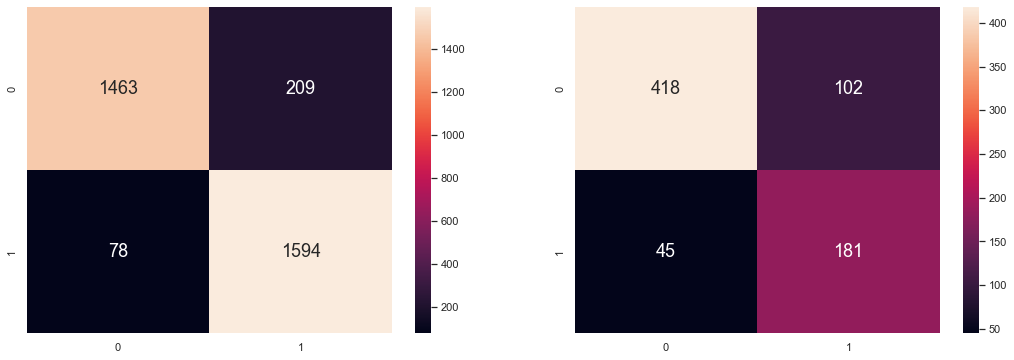

In [20]:
y_test_pred = CV_rfc_over.predict(X_test)
y_train_pred = CV_rfc_over.predict(X_train_oversampled)

evaluate_model(y_train_oversampled, y_train_pred, y_test, y_test_pred)